In [1]:
raw_data <- read.csv("Data_SSL_PSM.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 290208

In [2]:
# Checking the Missing Values 
sapply(raw_data,function(x) sum(is.na(x)))

PRE_RAW_HEAT_SCORE          AGE_GROUP             AGE_TO           AGE_CURR 
                 0                131                131                203 
       LATEST_DIST    LATEST_DIST_RES             DRUG_I           WEAPON_I 
                 0                  0                  0                  0 
      RACE_CODE_CD        SEX_CODE_CD       CPD_ARREST_I        LATEST_DATE 
                 0                  0                  0                  0

In [3]:
complete_data <- raw_data[complete.cases(raw_data),]
cat("After removing the incomplete rows, the number of rows are", nrow(complete_data))

After removing the incomplete rows, the number of rows are 290005

In [4]:
complete_data

,PRE_RAW_HEAT_SCORE,AGE_GROUP,AGE_TO,AGE_CURR,LATEST_DIST,LATEST_DIST_RES,DRUG_I,WEAPON_I,RACE_CODE_CD,SEX_CODE_CD,CPD_ARREST_I,LATEST_DATE
1,14196,20-30,20-30,20-30,31,31,N,Y,0,M,N,2015
2,14511,20-30,20-30,20-30,31,8,N,N,1,M,N,2016
3,12982,less than 20,less than 20,less than 20,31,8,N,N,1,M,N,2016
4,13110,less than 20,less than 20,less than 20,31,4,N,Y,0,M,Y,2016
5,12874,less than 20,less than 20,less than 20,31,31,N,Y,0,M,N,2016
6,13535,less than 20,less than 20,20-30,31,2,N,Y,0,M,N,2015
7,12632,less than 20,less than 20,less than 20,31,31,N,N,0,M,N,2015
8,12620,less than 20,less than 20,less than 20,31,5,N,N,0,M,Y,2016
9,12586,less than 20,less than 20,less than 20,31,2,N,Y,0,M,N,2016
10,12476,less than 20,less than 20,20-30,31,14,Y,Y,0,M,N,2016


In [5]:
#sub_set_complete_data<-complete_data[(complete_data$RACE_CODE_CD == "BLK") | (complete_data$RACE_CODE_CD == "WHI"),]

In [6]:
#nrow(sub_set_complete_data)

[1] 290005

In [5]:
# Converting the categorical variables into factors
complete_data$AGE_GROUP <- as.factor(complete_data$AGE_GROUP)
complete_data$AGE_TO <- as.factor(complete_data$AGE_TO)
complete_data$AGE_CURR<- as.factor(complete_data$AGE_CURR)
complete_data$LATEST_DIST<- as.factor(complete_data$LATEST_DIST)
complete_data$LATEST_DIST_RES<- as.factor(complete_data$LATEST_DIST_RES)
complete_data$DRUG_I<- as.factor(complete_data$DRUG_I)
complete_data$WEAPON_I<- as.factor(complete_data$WEAPON_I)
complete_data$RACE_CODE_CD<- as.factor(complete_data$RACE_CODE_CD) 
complete_data$SEX_CODE_CD<- as.factor(complete_data$SEX_CODE_CD)
complete_data$CPD_ARREST_I<- as.factor(complete_data$CPD_ARREST_I)
complete_data$LATEST_DATE<- as.factor(complete_data$LATEST_DATE)


In [6]:
library(MatchIt )

Warning message:
"package 'MatchIt' was built under R version 3.3.3"

In [7]:
m.out = matchit(RACE_CODE_CD~ PRE_RAW_HEAT_SCORE+AGE_GROUP + AGE_TO + AGE_CURR+LATEST_DIST+LATEST_DIST_RES+DRUG_I+WEAPON_I+
                  SEX_CODE_CD+CPD_ARREST_I+LATEST_DATE,
                data = complete_data, method = "nearest",
                ratio = 1)

In [8]:
m.out


Call: 
matchit(formula = RACE_CODE_CD ~ PRE_RAW_HEAT_SCORE + AGE_GROUP + 
    AGE_TO + AGE_CURR + LATEST_DIST + LATEST_DIST_RES + DRUG_I + 
    WEAPON_I + SEX_CODE_CD + CPD_ARREST_I + LATEST_DATE, data = complete_data, 
    method = "nearest", ratio = 1)

Sample sizes:
          Control Treated
All        207717   82288
Matched     82288   82288
Unmatched  125429       0
Discarded       0       0


[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

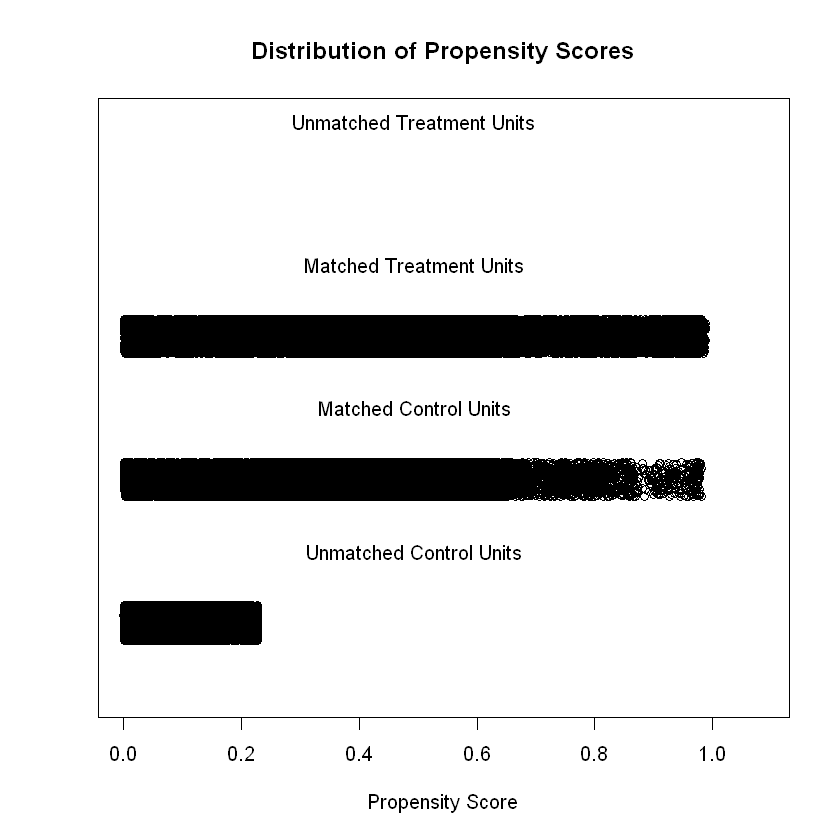

In [9]:
plot(m.out, type = "jitter")

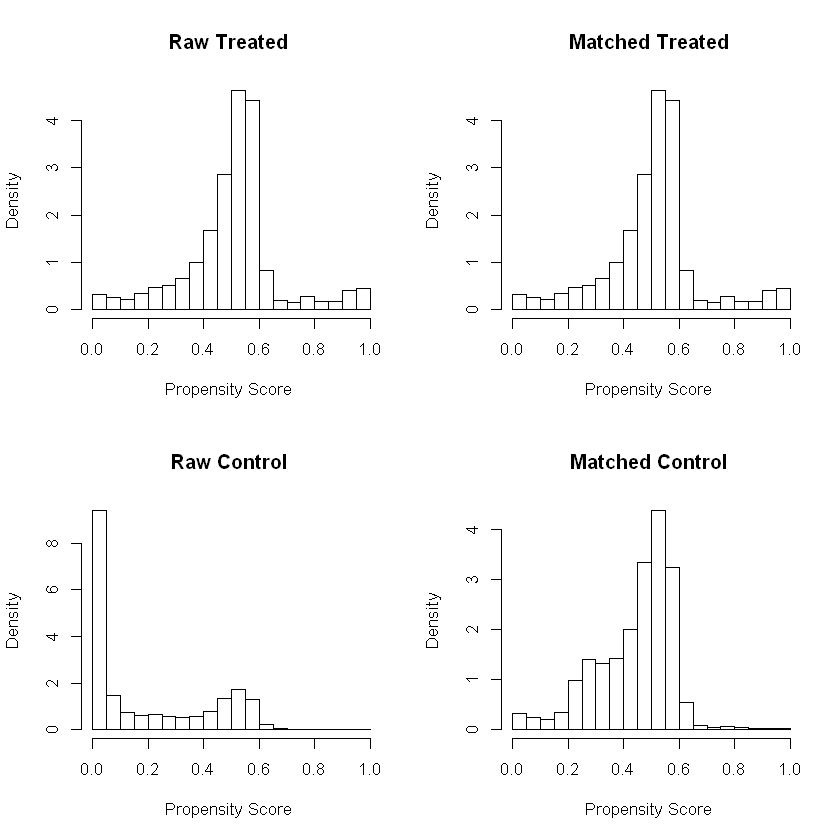

In [10]:
plot(m.out, type = "hist")